<a href="https://colab.research.google.com/github/haeniKim/Metaverse-academy/blob/master/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%EC%8B%A4%EC%8A%B5(230605)_1%EC%A1%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1조 데이터 분석 실습 

> 23.06.05-23.06.07

## 주제 : 서울시 구별 아파트 거래 가격과 주거 환경 분석

**조원 :**
김해니, 오수정, 이소영, 최눈솔


**주제 선정 이유:** 

  &emsp;집은 의식주에서 '주'를 담당하고 있는 만큼 필수적이고, 우리에게 먹고, 자고, 쉴 곳을 제공한다. 주거지를 선정하는데 있어서 우리는 하나의 요소가 아니라 다양한 부분을 비교하게 된다.

  &emsp;기본적으로 집값이 중요한 요소이고, 사람마다 집을 구하는 목적(학생 자취, 신혼집, 직장)과 주거지를 선택할 때 조건의 우선 순위에는 차이가 있다. 예를 들어, 교육에 중점을 둔 신혼부부는 교육 환경이 좋은 지역을 선호할 수 있다.

  &emsp;주거 환경은 생활에 직접적인 영향을 미치는 요소로, 주변 교통, 교육 시설, 문화시설 등 주거 환경은 거주자의 편의성과 행복도에 영향을 미친다. 따라서 데이터 분석을 통해 서울시 구별 아파트 거래 가격과 주거 환경을 탐색함으로써, 사람들이 서울에서 최적의 주거 선택을 할 수 있는 기준을 제공할 수 있다.


**데이터 출처:**

|항목|데이터명|출처
|------|---|---|
|출산율|합계출산율 및 모의 연령별 출산율(2021년)|통계청|
|아파트 거래가|실거래가 공개시스템(2021년)|국토교통부|
|사업체 현황|서울시 사업체현황 (산업대분류별/동별) 통계(2021년)|서울특별시|
|연령별/성별 인구|연령별 인구현황(2021년)|행정안전부|
|학교 현황|서울특별시교육청_학교 현황 정보|서울특별시교육청|

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. 데이터 전처리
* 파일 경로는 각자 경로에 맞게 수정

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 37.0 MB/s eta 0:00:00


In [ ]:
import koreanize_matplotlib

### 서울시 출산율 데이터

In [ ]:
df_fertility = pd.read_csv('/content/drive/MyDrive/Metaverse Academy/data/seoul_fertility_rate.csv')
df_fertility.head()

,자치구별(1),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7
0,자치구별(1),합계출산율,모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수)
1,자치구별(1),소계,15-19세,20-24세,25-29세,30-34세,35-39세,40-44세,45-49세
2,서울특별시,0.626,0.2,1.8,12.1,57.6,43.9,8.3,0.2
3,종로구,0.531,0.0,1.1,9.4,43.3,40.8,10.4,0.2
4,중구,0.634,0.0,1.0,10.5,55.8,49.4,10.2,0.2


In [ ]:
df_fertility.shape

(28, 9)

In [ ]:
df_fertility = df_fertility.iloc[3:,:]
df_fertility

,자치구별(1),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7
3,종로구,0.531,0.0,1.1,9.4,43.3,40.8,10.4,0.2
4,중구,0.634,0.0,1.0,10.5,55.8,49.4,10.2,0.2
5,용산구,0.664,0.5,1.8,10.8,59.7,47.7,11.1,0.3
6,성동구,0.764,0.0,1.3,11.2,74.5,55.6,9.7,0.2
7,광진구,0.525,0.3,1.4,9.6,46.1,38.7,7.7,0.3
8,동대문구,0.660,0.0,1.4,14.4,61.7,44.0,8.5,0.1
9,중랑구,0.650,0.1,3.5,15.2,58.9,42.7,9.4,0.1
10,성북구,0.656,0.4,1.5,13.0,62.1,44.7,8.1,0.1
11,강북구,0.541,0.0,3.1,14.1,44.4,37.4,7.2,0.2
12,도봉구,0.579,0.0,2.8,14.3,50.0,39.4,8.0,0.1


In [ ]:
df_fertility.columns = ['지역','합계출산율','출산율(15-19세)','출산율(20-24세)','출산율(25-29세)','출산율(30-34세)','출산율(35-39세)','출산율(40-44세)','출산율(45-49세)']

In [ ]:
df_fertility.head()

,지역,합계출산율,출산율(15-19세),출산율(20-24세),출산율(25-29세),출산율(30-34세),출산율(35-39세),출산율(40-44세),출산율(45-49세)
3,종로구,0.531,0.0,1.1,9.4,43.3,40.8,10.4,0.2
4,중구,0.634,0.0,1.0,10.5,55.8,49.4,10.2,0.2
5,용산구,0.664,0.5,1.8,10.8,59.7,47.7,11.1,0.3
6,성동구,0.764,0.0,1.3,11.2,74.5,55.6,9.7,0.2
7,광진구,0.525,0.3,1.4,9.6,46.1,38.7,7.7,0.3


In [ ]:
df_fertility.index = [i for i in range(25)]

In [ ]:
df_fertility.head()

,지역,합계출산율,출산율(15-19세),출산율(20-24세),출산율(25-29세),출산율(30-34세),출산율(35-39세),출산율(40-44세),출산율(45-49세)
0,종로구,0.531,0.0,1.1,9.4,43.3,40.8,10.4,0.2
1,중구,0.634,0.0,1.0,10.5,55.8,49.4,10.2,0.2
2,용산구,0.664,0.5,1.8,10.8,59.7,47.7,11.1,0.3
3,성동구,0.764,0.0,1.3,11.2,74.5,55.6,9.7,0.2
4,광진구,0.525,0.3,1.4,9.6,46.1,38.7,7.7,0.3


In [ ]:
df_fertility.to_csv('seoul_fertility_rate.csv', encoding='CP949')

### 서울시 연령별 인구

In [ ]:
#인구수 전처리, 필요없는 부분 날리고 행정기관을 지역으로 변경
population = pd.read_excel('population.xlsx')
population.columns = population.iloc[2][:]
population = population.iloc[4:,1:15]
population.drop(['총 거주자수', '연령구간인구수'], axis=1, inplace=True)
population.rename(columns={'행정기관': '지역'},inplace = True)
population

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


2,지역,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,100세 이상
4,서울특별시 종로구,"6,973","10,308","22,634","19,219","20,465","24,183","19,604","11,275","5,953",879,24
5,서울특별시 중구,"6,284","6,405","18,176","19,648","16,894","19,341","17,476","9,944","4,815",747,18
6,서울특별시 용산구,"12,613","14,505","32,457","37,158","32,817","34,686","27,802","15,204","8,141","1,235",37
7,서울특별시 성동구,"19,207","18,812","43,259","46,467","42,742","45,262","37,070","19,791","8,863","1,105",34
8,서울특별시 광진구,"17,726","24,700","61,394","54,331","49,763","52,847","43,370","21,697","9,384","1,196",39
9,서울특별시 동대문구,"19,567","22,683","55,996","48,683","48,366","51,264","46,791","27,052","12,020","1,419",53
10,서울특별시 중랑구,"21,274","25,366","53,903","56,649","55,136","66,503","60,015","30,952","12,570","1,556",39
11,서울특별시 성북구,"27,307","35,871","65,280","58,025","66,633","68,068","55,843","32,090","14,944","1,953",40
12,서울특별시 강북구,"14,134","20,738","40,783","36,813","43,255","50,757","46,453","29,085","12,396","1,408",37
13,서울특별시 도봉구,"17,022","24,233","41,311","38,939","45,666","55,265","50,748","27,279","12,372","1,643",50


In [ ]:
#지역에서 앞에 서울특별시 제거
temp = []
for i in population['지역']:
  temp.append(i.split()[-1])
population['지역'] = temp
population

2,지역,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,100세 이상
4,종로구,"6,973","10,308","22,634","19,219","20,465","24,183","19,604","11,275","5,953",879,24
5,중구,"6,284","6,405","18,176","19,648","16,894","19,341","17,476","9,944","4,815",747,18
6,용산구,"12,613","14,505","32,457","37,158","32,817","34,686","27,802","15,204","8,141","1,235",37
7,성동구,"19,207","18,812","43,259","46,467","42,742","45,262","37,070","19,791","8,863","1,105",34
8,광진구,"17,726","24,700","61,394","54,331","49,763","52,847","43,370","21,697","9,384","1,196",39
9,동대문구,"19,567","22,683","55,996","48,683","48,366","51,264","46,791","27,052","12,020","1,419",53
10,중랑구,"21,274","25,366","53,903","56,649","55,136","66,503","60,015","30,952","12,570","1,556",39
11,성북구,"27,307","35,871","65,280","58,025","66,633","68,068","55,843","32,090","14,944","1,953",40
12,강북구,"14,134","20,738","40,783","36,813","43,255","50,757","46,453","29,085","12,396","1,408",37
13,도봉구,"17,022","24,233","41,311","38,939","45,666","55,265","50,748","27,279","12,372","1,643",50


In [ ]:
#저장
population.to_csv('population.csv', encoding='CP949')

### 서울시 아파트 거래가

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Metaverse Academy/data/아파트 매매.xlsx')
df.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,□ 본 서비스에서 제공하는 정보는 법적인 효력이 없으므로 참고용으로만 활용하시기 바랍니다.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,"□ 신고정보가 실시간 변경, 해제되어 제공시점에 따라 공개건수 및 내용이 상이할 수...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"□ 본 자료는 계약일 기준입니다. (※ 7월 계약, 8월 신고건 → 7월 거래건으로...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"□ 통계자료 활용시에는 수치가 왜곡될 수 있으니 참고자료로만 활용하시기 바라며, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,* 국토교통부 실거래가 공개시스템의 궁금하신 점이나 문의사항은 주택거래신고 1588...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data =df 
col = data.iloc[15][:]
data = data.iloc[16:][:].rename(columns = col)
data

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
16,서울특별시 강남구 개포동,655-2,0655,0002,개포2차현대아파트(220),77.75,202104,15,"174,000",9,1988,언주로 103,NaN,-,-
17,서울특별시 강남구 개포동,658-1,0658,0001,개포6차우성아파트1동~8동,79.97,202105,15,"195,000",5,1987,언주로 3,NaN,-,-
18,서울특별시 강남구 개포동,658-1,0658,0001,개포6차우성아파트1동~8동,79.97,202108,11,"200,000",3,1987,언주로 3,NaN,-,-
19,서울특별시 강남구 개포동,658-1,0658,0001,개포6차우성아파트1동~8동,79.97,202109,2,"220,000",2,1987,언주로 3,NaN,-,-
20,서울특별시 강남구 개포동,658-1,0658,0001,개포6차우성아파트1동~8동,79.97,202112,4,"215,000",3,1987,언주로 3,NaN,중개거래,서울 강남구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43475,서울특별시 중랑구 중화동,274-51,0274,0051,한영(101),57.66,202102,27,"30,500",5,2003,동일로144길 74,NaN,-,-
43476,서울특별시 중랑구 중화동,274-51,0274,0051,한영(101),84.69,202111,4,"50,000",2,2003,동일로144길 74,NaN,중개거래,"서울 송파구, 서울 중랑구"
43477,서울특별시 중랑구 중화동,274-75,0274,0075,한영(102),72.22,202105,4,"49,500",4,2003,동일로144길 74,NaN,-,-
43478,서울특별시 중랑구 중화동,274-76,0274,0076,한영(103),58.46,202107,1,"30,000",2,2003,동일로144길 74,NaN,-,-


In [ ]:
data.isnull().sum()

시군구             0
번지             14
본번              5
부번              5
단지명             0
전용면적(㎡)         0
계약년월            0
계약일             0
거래금액(만원)        0
층               0
건축년도            0
도로명             0
해제사유발생일     41989
거래유형            0
중개사소재지          0
dtype: int64

In [ ]:
temp = []
for i in data['거래금액(만원)']:
  temp.append(int(''.join(i.split(','))))
data['거래금액(만원)'] = temp

temp = []
for i in data['시군구']:
  temp.append(i.split(' ')[1])
data['시군구'] = temp

In [ ]:
new = data.groupby('시군구',as_index=False)['거래금액(만원)'].mean()
new = new.sort_values(by = '거래금액(만원)',ascending = False)
new

,시군구,거래금액(만원)
0,강남구,207219.524190
14,서초구,205079.347411
20,용산구,199105.796031
17,송파구,154346.286920
15,성동구,144546.348684
5,광진구,119721.447721
12,마포구,116794.593090
11,동작구,111730.379377
18,양천구,103119.236354
19,영등포구,101948.649895


In [ ]:
new.rename(columns= {'시군구':'지역'},inplace = True)

In [ ]:
new.to_csv('seoul_house_price.csv',encoding = 'cp949')

<Axes: xlabel='지역'>

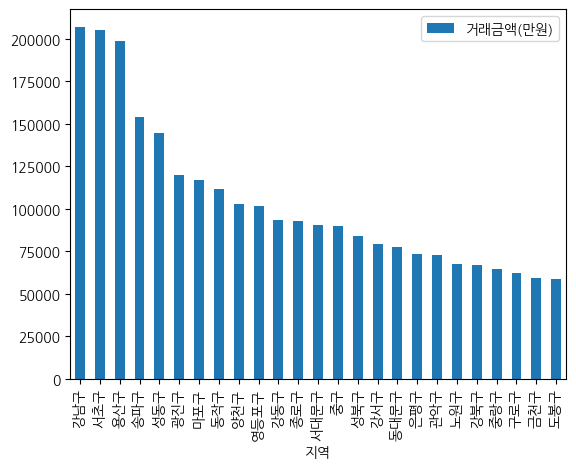

In [ ]:
new.plot.bar(rot=90,x = '지역')

### 서울시 사업체 현황

In [ ]:
# 데이터 불러오기
df = pd.read_excel('/content/drive/MyDrive/Metaverse Academy/data/사업체현황(산업대분류별_동별)(2017년+이후)_20230605160240.xlsx', header=None)
df.head(10)

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,동별(1),동별(2),2021,2021,2021,2021,2021,2021,2021,2021,...,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021
1,동별(1),동별(2),합계,합계,합계,합계,합계,합계,합계,합계,...,합계,합계,합계,합계,합계,합계,합계,합계,합계,합계
2,동별(1),동별(2),소계,소계,소계,소계,소계,농업 임업 및 어업,농업 임업 및 어업,광업,...,공공행정 국방 및 사회보장 행정,공공행정 국방 및 사회보장 행정,교육 서비스업,교육 서비스업,보건업 및 사회복지 서비스업,보건업 및 사회복지 서비스업,예술 스포츠 및 여가관련 서비스업,예술 스포츠 및 여가관련 서비스업,협회 및 단체 수리 및 기타 개인 서비스업,협회 및 단체 수리 및 기타 개인 서비스업
3,동별(1),동별(2),사업체수,사업체수,종사자수,종사자수,종사자수,사업체수,종사자수,사업체수,...,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수
4,동별(1),동별(2),소계,여성대표자,소계,남,여,소계,소계,소계,...,소계,소계,소계,소계,소계,소계,소계,소계,소계,소계
5,합계,소계,1188091,407948,5771226,3218529,2552697,154,753,25,...,1303,155790,46855,361663,31866,450396,28722,88491,77887,186496
6,NaN,종로구,48361,16563,275063,153210,121853,4,21,4,...,100,17436,1082,13298,830,19143,1141,5650,2591,7297
7,NaN,중구,70308,25794,386564,213782,172782,1,1,2,...,65,16141,644,9425,813,11585,632,3258,2175,7632
8,NaN,용산구,29680,10454,152605,84314,68291,4,8,-,...,45,3416,844,7352,632,8219,651,3006,1866,5572
9,NaN,성동구,41665,13447,203221,116978,86243,7,15,1,...,45,5243,1283,10453,815,9635,844,2956,2341,7334


In [ ]:
df.tail(10)

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
21,NaN,강서구,58806,19887,290473,164478,125995,5,44,-,...,61,5236,2505,14779,1735,24758,1479,4024,4413,10461
22,NaN,구로구,52791,16161,240689,140067,100622,6,18,-,...,46,5153,1613,11771,1258,18241,1047,2527,2968,6714
23,NaN,금천구,47964,13700,255449,158019,97430,1,2,-,...,31,2368,937,6810,763,8866,697,1478,2241,5575
24,NaN,영등포구,74562,22629,435017,253173,181844,9,17,2,...,70,9379,1717,9441,1345,19680,1395,4228,3549,11998
25,NaN,동작구,27915,10964,109281,54637,54644,4,6,-,...,41,4213,1615,13728,1110,16024,916,2052,2484,5093
26,NaN,관악구,37915,13641,128417,68392,60025,2,18,1,...,50,3809,1596,17130,1257,16081,1286,2954,3404,6247
27,NaN,서초구,71958,23066,487976,290084,197892,19,86,1,...,69,12994,3451,26294,1930,24825,1752,6911,3810,12609
28,NaN,강남구,110007,35453,801419,447809,353610,27,137,6,...,58,7471,5459,34053,3522,47080,2579,11059,5984,21981
29,NaN,송파구,74531,25400,400781,244588,156193,26,241,1,...,70,8333,3146,19154,2055,30552,2026,7881,4830,10574
30,NaN,강동구,41660,15226,157465,83415,74050,13,74,1,...,45,3057,2060,11621,1423,23580,1095,2595,3387,6170


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       6 non-null      object
 1   1       31 non-null     object
 2   2       31 non-null     object
 3   3       31 non-null     object
 4   4       31 non-null     object
 5   5       31 non-null     object
 6   6       31 non-null     object
 7   7       31 non-null     object
 8   8       31 non-null     object
 9   9       31 non-null     object
 10  10      31 non-null     object
 11  11      31 non-null     object
 12  12      31 non-null     object
 13  13      31 non-null     object
 14  14      31 non-null     object
 15  15      31 non-null     object
 16  16      31 non-null     object
 17  17      31 non-null     object
 18  18      31 non-null     object
 19  19      31 non-null     object
 20  20      31 non-null     object
 21  21      31 non-null     object
 22  22      31 non-null     obje

In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
count,6,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
unique,2,27,30,31,30,31,31,19,25,11,...,26,31,31,31,31,31,31,31,31,31
top,동별(1),동별(2),소계,2021,소계,2021,2021,1,4,-,...,45,2021,2021,2021,2021,2021,2021,2021,2021,2021
freq,5,5,2,1,2,1,1,6,3,12,...,3,1,1,1,1,1,1,1,1,1


In [ ]:
# 필요한 행/열 선택하기

data = df.iloc[:, 1::2]  # 사업체수 제거하기
data = data.drop([0,1,3,4,5]) # 0, 1, 3, 4번 행 삭제
data = data.drop([3,5], axis=1) # 3,5 열 삭제
data

,1,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43
2,동별(2),농업 임업 및 어업,광업,제조업,전기 가스 증기 및 공기조절 공급업,수도 하수 및 폐기물 처리 원료 재생업,건설업,도매 및 소매업,운수 및 창고업,숙박 및 음식점업,정보통신업,금융 및 보험업,부동산업,전문 과학 및 기술 서비스업,사업시설 관리 사업 지원 및 임대 서비스업,공공행정 국방 및 사회보장 행정,교육 서비스업,보건업 및 사회복지 서비스업,예술 스포츠 및 여가관련 서비스업,협회 및 단체 수리 및 기타 개인 서비스업
6,종로구,4,4,5318,30,8,631,18683,1699,6866,1545,952,2621,2706,1550,100,1082,830,1141,2591
7,중구,1,2,10469,11,17,639,32947,2325,6253,1655,2921,3132,3703,1904,65,644,813,632,2175
8,용산구,4,-,1371,12,22,869,10038,1739,4880,1302,566,2137,1999,703,45,844,632,651,1866
9,성동구,7,1,5397,34,34,2046,11731,2994,4413,2312,456,2401,3572,939,45,1283,815,844,2341
10,광진구,3,-,2239,17,21,1616,9273,2778,5118,1103,274,2146,1751,943,38,1467,981,1139,2799
11,동대문구,2,1,3922,15,31,3347,14774,3956,5108,781,374,2201,1305,895,49,1288,1085,889,2790
12,중랑구,-,2,4256,11,34,4644,9064,5830,4453,674,206,1722,1085,892,47,1151,1111,1029,3099
13,성북구,1,-,3138,30,24,1591,9143,3691,4683,1115,230,1918,1415,773,49,1806,1131,1043,2931
14,강북구,1,-,2067,10,18,1582,6807,3102,4001,561,352,1243,824,641,42,890,867,869,2508


In [ ]:
# 첫번째 행을 column 명으로 지정

data = data.rename(columns=data.iloc[0])
data

,동별(2),농업 임업 및 어업,광업,제조업,전기 가스 증기 및 공기조절 공급업,수도 하수 및 폐기물 처리 원료 재생업,건설업,도매 및 소매업,운수 및 창고업,숙박 및 음식점업,정보통신업,금융 및 보험업,부동산업,전문 과학 및 기술 서비스업,사업시설 관리 사업 지원 및 임대 서비스업,공공행정 국방 및 사회보장 행정,교육 서비스업,보건업 및 사회복지 서비스업,예술 스포츠 및 여가관련 서비스업,협회 및 단체 수리 및 기타 개인 서비스업
2,동별(2),농업 임업 및 어업,광업,제조업,전기 가스 증기 및 공기조절 공급업,수도 하수 및 폐기물 처리 원료 재생업,건설업,도매 및 소매업,운수 및 창고업,숙박 및 음식점업,정보통신업,금융 및 보험업,부동산업,전문 과학 및 기술 서비스업,사업시설 관리 사업 지원 및 임대 서비스업,공공행정 국방 및 사회보장 행정,교육 서비스업,보건업 및 사회복지 서비스업,예술 스포츠 및 여가관련 서비스업,협회 및 단체 수리 및 기타 개인 서비스업
6,종로구,4,4,5318,30,8,631,18683,1699,6866,1545,952,2621,2706,1550,100,1082,830,1141,2591
7,중구,1,2,10469,11,17,639,32947,2325,6253,1655,2921,3132,3703,1904,65,644,813,632,2175
8,용산구,4,-,1371,12,22,869,10038,1739,4880,1302,566,2137,1999,703,45,844,632,651,1866
9,성동구,7,1,5397,34,34,2046,11731,2994,4413,2312,456,2401,3572,939,45,1283,815,844,2341
10,광진구,3,-,2239,17,21,1616,9273,2778,5118,1103,274,2146,1751,943,38,1467,981,1139,2799
11,동대문구,2,1,3922,15,31,3347,14774,3956,5108,781,374,2201,1305,895,49,1288,1085,889,2790
12,중랑구,-,2,4256,11,34,4644,9064,5830,4453,674,206,1722,1085,892,47,1151,1111,1029,3099
13,성북구,1,-,3138,30,24,1591,9143,3691,4683,1115,230,1918,1415,773,49,1806,1131,1043,2931
14,강북구,1,-,2067,10,18,1582,6807,3102,4001,561,352,1243,824,641,42,890,867,869,2508


In [ ]:
# 첫번째 행 삭제하기
data = data.drop(data.index[0])
data

,동별(2),농업 임업 및 어업,광업,제조업,전기 가스 증기 및 공기조절 공급업,수도 하수 및 폐기물 처리 원료 재생업,건설업,도매 및 소매업,운수 및 창고업,숙박 및 음식점업,정보통신업,금융 및 보험업,부동산업,전문 과학 및 기술 서비스업,사업시설 관리 사업 지원 및 임대 서비스업,공공행정 국방 및 사회보장 행정,교육 서비스업,보건업 및 사회복지 서비스업,예술 스포츠 및 여가관련 서비스업,협회 및 단체 수리 및 기타 개인 서비스업
6,종로구,4,4,5318,30,8,631,18683,1699,6866,1545,952,2621,2706,1550,100,1082,830,1141,2591
7,중구,1,2,10469,11,17,639,32947,2325,6253,1655,2921,3132,3703,1904,65,644,813,632,2175
8,용산구,4,-,1371,12,22,869,10038,1739,4880,1302,566,2137,1999,703,45,844,632,651,1866
9,성동구,7,1,5397,34,34,2046,11731,2994,4413,2312,456,2401,3572,939,45,1283,815,844,2341
10,광진구,3,-,2239,17,21,1616,9273,2778,5118,1103,274,2146,1751,943,38,1467,981,1139,2799
11,동대문구,2,1,3922,15,31,3347,14774,3956,5108,781,374,2201,1305,895,49,1288,1085,889,2790
12,중랑구,-,2,4256,11,34,4644,9064,5830,4453,674,206,1722,1085,892,47,1151,1111,1029,3099
13,성북구,1,-,3138,30,24,1591,9143,3691,4683,1115,230,1918,1415,773,49,1806,1131,1043,2931
14,강북구,1,-,2067,10,18,1582,6807,3102,4001,561,352,1243,824,641,42,890,867,869,2508
15,도봉구,2,-,1350,15,16,1474,6178,5058,3003,516,182,1140,828,617,37,1114,859,738,2264


In [ ]:
# 동별(2)를 지역으로 변경
data = data.rename(columns={'동별(2)':'지역'}) 
data

,지역,농업 임업 및 어업,광업,제조업,전기 가스 증기 및 공기조절 공급업,수도 하수 및 폐기물 처리 원료 재생업,건설업,도매 및 소매업,운수 및 창고업,숙박 및 음식점업,정보통신업,금융 및 보험업,부동산업,전문 과학 및 기술 서비스업,사업시설 관리 사업 지원 및 임대 서비스업,공공행정 국방 및 사회보장 행정,교육 서비스업,보건업 및 사회복지 서비스업,예술 스포츠 및 여가관련 서비스업,협회 및 단체 수리 및 기타 개인 서비스업
6,종로구,4,4,5318,30,8,631,18683,1699,6866,1545,952,2621,2706,1550,100,1082,830,1141,2591
7,중구,1,2,10469,11,17,639,32947,2325,6253,1655,2921,3132,3703,1904,65,644,813,632,2175
8,용산구,4,-,1371,12,22,869,10038,1739,4880,1302,566,2137,1999,703,45,844,632,651,1866
9,성동구,7,1,5397,34,34,2046,11731,2994,4413,2312,456,2401,3572,939,45,1283,815,844,2341
10,광진구,3,-,2239,17,21,1616,9273,2778,5118,1103,274,2146,1751,943,38,1467,981,1139,2799
11,동대문구,2,1,3922,15,31,3347,14774,3956,5108,781,374,2201,1305,895,49,1288,1085,889,2790
12,중랑구,-,2,4256,11,34,4644,9064,5830,4453,674,206,1722,1085,892,47,1151,1111,1029,3099
13,성북구,1,-,3138,30,24,1591,9143,3691,4683,1115,230,1918,1415,773,49,1806,1131,1043,2931
14,강북구,1,-,2067,10,18,1582,6807,3102,4001,561,352,1243,824,641,42,890,867,869,2508
15,도봉구,2,-,1350,15,16,1474,6178,5058,3003,516,182,1140,828,617,37,1114,859,738,2264


In [ ]:
# 결측치 제거하기
data = data.replace('-', 0)
data

,지역,농업 임업 및 어업,광업,제조업,전기 가스 증기 및 공기조절 공급업,수도 하수 및 폐기물 처리 원료 재생업,건설업,도매 및 소매업,운수 및 창고업,숙박 및 음식점업,정보통신업,금융 및 보험업,부동산업,전문 과학 및 기술 서비스업,사업시설 관리 사업 지원 및 임대 서비스업,공공행정 국방 및 사회보장 행정,교육 서비스업,보건업 및 사회복지 서비스업,예술 스포츠 및 여가관련 서비스업,협회 및 단체 수리 및 기타 개인 서비스업
6,종로구,4,4,5318,30,8,631,18683,1699,6866,1545,952,2621,2706,1550,100,1082,830,1141,2591
7,중구,1,2,10469,11,17,639,32947,2325,6253,1655,2921,3132,3703,1904,65,644,813,632,2175
8,용산구,4,0,1371,12,22,869,10038,1739,4880,1302,566,2137,1999,703,45,844,632,651,1866
9,성동구,7,1,5397,34,34,2046,11731,2994,4413,2312,456,2401,3572,939,45,1283,815,844,2341
10,광진구,3,0,2239,17,21,1616,9273,2778,5118,1103,274,2146,1751,943,38,1467,981,1139,2799
11,동대문구,2,1,3922,15,31,3347,14774,3956,5108,781,374,2201,1305,895,49,1288,1085,889,2790
12,중랑구,0,2,4256,11,34,4644,9064,5830,4453,674,206,1722,1085,892,47,1151,1111,1029,3099
13,성북구,1,0,3138,30,24,1591,9143,3691,4683,1115,230,1918,1415,773,49,1806,1131,1043,2931
14,강북구,1,0,2067,10,18,1582,6807,3102,4001,561,352,1243,824,641,42,890,867,869,2508
15,도봉구,2,0,1350,15,16,1474,6178,5058,3003,516,182,1140,828,617,37,1114,859,738,2264


In [ ]:
data = data.set_index('지역', drop=True)  # 지역으로 행이름 변경하기

In [ ]:
# csv파일로 저장
data.to_csv('/content/drive/MyDrive/Metaverse Academy/data/store.csv', encoding='utf-8-sig') 

### 데이터 병합

In [ ]:
fertility_rate = pd.read_csv('seoul_fertility_rate.csv',encoding = 'cp949', index_col ='지역')
house_price = pd.read_csv('seoul_house_price.csv',encoding = 'cp949', index_col ='지역')
store_distribution = pd.read_csv('store.csv', index_col ='지역')
population = pd.read_csv('population.csv',encoding = 'cp949', index_col ='지역')

In [ ]:
fertility_rate.drop(['Unnamed: 0'], axis = 1, inplace = True)
house_price.drop(['Unnamed: 0'], axis = 1, inplace = True)
population.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
#출산율, 아파트 평균 거래가, 사업체 분포, 인구수를 지역 기준으로 병합
seoul = pd.concat([fertility_rate,house_price,store_distribution,population], axis = 1)
seoul.head()

,합계출산율,출산율(15-19세),출산율(20-24세),출산율(25-29세),출산율(30-34세),출산율(35-39세),출산율(40-44세),출산율(45-49세),거래금액(만원),농업 임업 및 어업,...,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,100세 이상
지역,,,,,,,,,,,,,,,,,,,,,
종로구,0.531,0.0,1.1,9.4,43.3,40.8,10.4,0.2,92944.505495,4,...,"10,308","22,634","19,219","20,465","24,183","19,604","11,275","5,953",879,24
중구,0.634,0.0,1.0,10.5,55.8,49.4,10.2,0.2,89991.343089,1,...,"6,405","18,176","19,648","16,894","19,341","17,476","9,944","4,815",747,18
용산구,0.664,0.5,1.8,10.8,59.7,47.7,11.1,0.3,199105.796031,4,...,"14,505","32,457","37,158","32,817","34,686","27,802","15,204","8,141","1,235",37
성동구,0.764,0.0,1.3,11.2,74.5,55.6,9.7,0.2,144546.348684,7,...,"18,812","43,259","46,467","42,742","45,262","37,070","19,791","8,863","1,105",34
광진구,0.525,0.3,1.4,9.6,46.1,38.7,7.7,0.3,119721.447721,3,...,"24,700","61,394","54,331","49,763","52,847","43,370","21,697","9,384","1,196",39


In [ ]:
seoul.to_csv('seoul_data.csv', encoding = 'cp949')

## 2. 데이터 분석/시각화

In [ ]:
seoul_df = pd.read_csv('seoul_data.csv', encoding='cp949')

### 구별 아파트 평균 거래가격

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '종로구'),
  Text(1, 0, '중구'),
  Text(2, 0, '용산구'),
  Text(3, 0, '성동구'),
  Text(4, 0, '광진구'),
  Text(5, 0, '동대문구'),
  Text(6, 0, '중랑구'),
  Text(7, 0, '성북구'),
  Text(8, 0, '강북구'),
  Text(9, 0, '도봉구'),
  Text(10, 0, '노원구'),
  Text(11, 0, '은평구'),
  Text(12, 0, '서대문구'),
  Text(13, 0, '마포구'),
  Text(14, 0, '양천구'),
  Text(15, 0, '강서구'),
  Text(16, 0, '구로구'),
  Text(17, 0, '금천구'),
  Text(18, 0, '영등포구'),
  Text(19, 0, '동작구'),
  Text(20, 0, '관악구'),
  Text(21, 0, '서초구'),
  Text(22, 0, '강남구'),
  Text(23, 0, '송파구'),
  Text(24, 0, '강동구')])

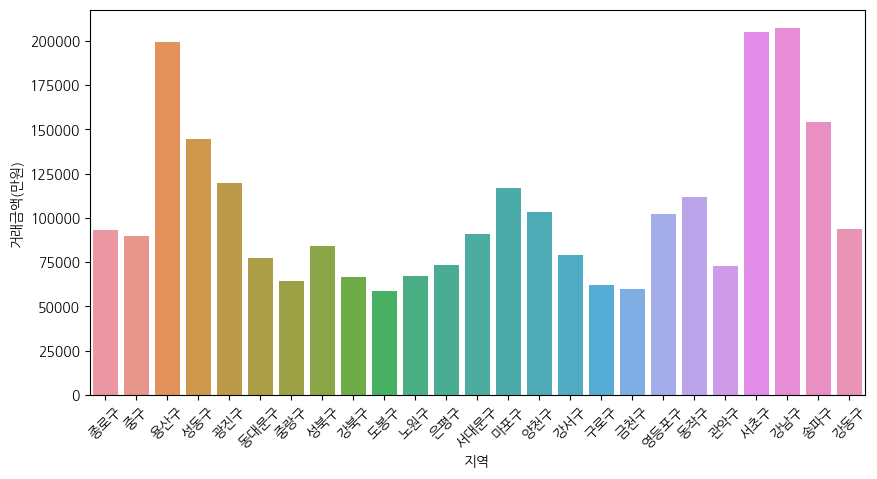

In [ ]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x='지역',y='거래금액(만원)', data = seoul_df)
plt.xticks(rotation=45)

In [ ]:
seoul_df.sort_values(by=['거래금액(만원)'], ascending=False).loc[:,['지역','거래금액(만원)']].head()

,지역,거래금액(만원)
22,강남구,207219.524190
21,서초구,205079.347411
2,용산구,199105.796031
23,송파구,154346.286920
3,성동구,144546.348684


-> 강남구, 서초구, 용산구의 아파트 거래 금액이 높으며 약 20억 정도에 거래됨.

### 구별 출산율과 아파트 거래 가격의 상관관계
(단순히 지역별 가격과 출산율만 가지고 계산)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '종로구'),
  Text(1, 0, '중구'),
  Text(2, 0, '용산구'),
  Text(3, 0, '성동구'),
  Text(4, 0, '광진구'),
  Text(5, 0, '동대문구'),
  Text(6, 0, '중랑구'),
  Text(7, 0, '성북구'),
  Text(8, 0, '강북구'),
  Text(9, 0, '도봉구'),
  Text(10, 0, '노원구'),
  Text(11, 0, '은평구'),
  Text(12, 0, '서대문구'),
  Text(13, 0, '마포구'),
  Text(14, 0, '양천구'),
  Text(15, 0, '강서구'),
  Text(16, 0, '구로구'),
  Text(17, 0, '금천구'),
  Text(18, 0, '영등포구'),
  Text(19, 0, '동작구'),
  Text(20, 0, '관악구'),
  Text(21, 0, '서초구'),
  Text(22, 0, '강남구'),
  Text(23, 0, '송파구'),
  Text(24, 0, '강동구')])

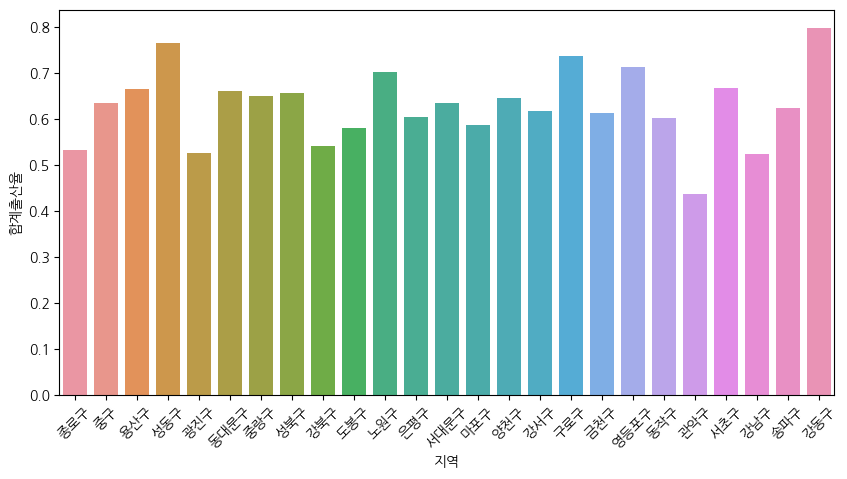

In [ ]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x='지역',y='합계출산율', data = seoul_df)
plt.xticks(rotation=45)

In [ ]:
seoul_df.sort_values(by=['합계출산율'], ascending=False).loc[:,['지역','합계출산율']].head()

,지역,합계출산율
24,강동구,0.797
3,성동구,0.764
16,구로구,0.737
18,영등포구,0.713
10,노원구,0.701


-> 출산율이 높은 지역은 강동구, 성동구, 구로구 순이다. 

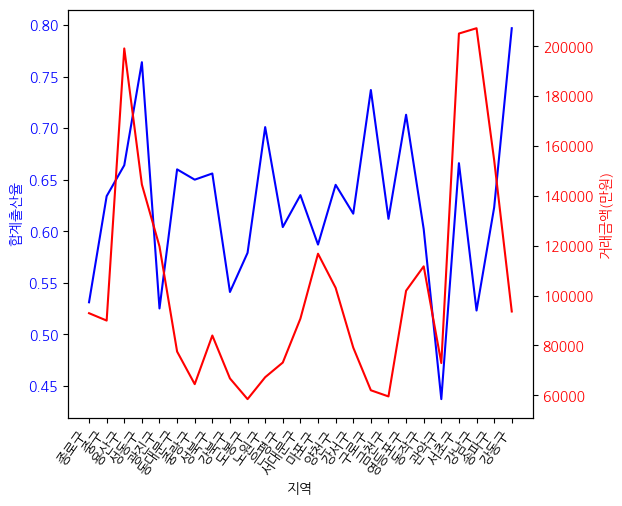

In [ ]:
#둘을 나누어 상대적으로 표시
fig = plt.figure(figsize=(6,6)) # 캔버스 생성
fig.set_facecolor('white') #배경은 흰색
ax1 = fig.add_subplot() # axes 생성
 
color1 = 'b' #출산률은 파란색
ax1.plot(seoul_df['지역'], seoul_df['합계출산율'], color=color1)
ax1.set_xlabel('지역')
ax1.set_ylabel('합계출산율', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
 
color2 = 'r' #집값은 빨강색
ax2 = ax1.twinx()
ax2.plot(seoul_df['지역'], seoul_df['거래금액(만원)'], color=color2)
ax2.set_ylabel('거래금액(만원)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
fig.autofmt_xdate(rotation =55) #지역명이 길어서 회전
plt.show()

In [ ]:
#출산율과 아파트 거래가격 상관계수
np.corrcoef(seoul_df['합계출산율'],seoul_df['거래금액(만원)'])[0,1]

0.021526022601038856

-> 상관계수 0.02로 거의 관계가 없다고 볼 수 있다. 

### 구별 연령별 인구 분포

In [ ]:
 age_type = seoul_df.set_index('지역').iloc[:,28:]
 age_type.head()

,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,100세 이상
지역,,,,,,,,,,,
종로구,"6,973","10,308","22,634","19,219","20,465","24,183","19,604","11,275","5,953",879,24
중구,"6,284","6,405","18,176","19,648","16,894","19,341","17,476","9,944","4,815",747,18
용산구,"12,613","14,505","32,457","37,158","32,817","34,686","27,802","15,204","8,141","1,235",37
성동구,"19,207","18,812","43,259","46,467","42,742","45,262","37,070","19,791","8,863","1,105",34
광진구,"17,726","24,700","61,394","54,331","49,763","52,847","43,370","21,697","9,384","1,196",39


In [ ]:
age_type['100세 이상'] = age_type['100세 이상'].astype('str')

In [ ]:
# , 제거
age_type = age_type.applymap(lambda x: x.replace(',', ''))

In [ ]:
#값 정수형으로 변환
age_type = age_type.astype('int')

In [ ]:
df_freq = age_type.div(age_type.sum(axis=1), axis=0)*100
# columns 순서 정렬 
df_freq = df_freq.reindex(sorted(df_freq.columns), axis=1)

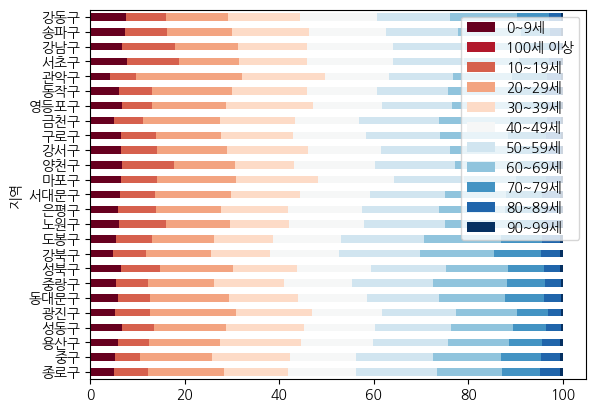

In [ ]:
df_freq.plot(kind="barh", stacked=True, colormap='RdBu')
plt.legend(loc='upper right')

-> 대체적으로 비슷한 분포를 보이지만 도봉구, 강북구는 청년 인구보다 중년, 노년층의 비율이 높은 편이다. 

### 구별 학교 현황(유치원, 초, 중, 고등학교)

In [ ]:
school = pd.read_csv('school.csv', encoding='cp949')
school.head()

,지역,유치원,초등학교,중학교,고등학교,전체 학교
0,동대문구,28.0,21.0,15.0,11.0,75.0
1,중랑구,33.0,24.0,14.0,10.0,81.0
2,마포구,27.0,22.0,14.0,9.0,72.0
3,서대문구,23.0,19.0,14.0,7.0,63.0
4,은평구,40.0,30.0,18.0,18.0,106.0


In [ ]:
school

,지역,유치원,초등학교,중학교,고등학교,전체 학교
0,동대문구,28.0,21.0,15.0,11.0,75.0
1,중랑구,33.0,24.0,14.0,10.0,81.0
2,마포구,27.0,22.0,14.0,9.0,72.0
3,서대문구,23.0,19.0,14.0,7.0,63.0
4,은평구,40.0,30.0,18.0,18.0,106.0
5,구로구,32.0,26.0,14.0,14.0,86.0
6,금천구,17.0,18.0,9.0,6.0,50.0
7,영등포구,39.0,23.0,12.0,9.0,83.0
8,노원구,60.0,42.0,26.0,25.0,153.0
9,도봉구,28.0,23.0,13.0,10.0,74.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '동대문구'),
  Text(1, 0, '중랑구'),
  Text(2, 0, '마포구'),
  Text(3, 0, '서대문구'),
  Text(4, 0, '은평구'),
  Text(5, 0, '구로구'),
  Text(6, 0, '금천구'),
  Text(7, 0, '영등포구'),
  Text(8, 0, '노원구'),
  Text(9, 0, '도봉구'),
  Text(10, 0, '용산구'),
  Text(11, 0, '종로구'),
  Text(12, 0, '중구'),
  Text(13, 0, '강동구'),
  Text(14, 0, '송파구'),
  Text(15, 0, '강서구'),
  Text(16, 0, '양천구'),
  Text(17, 0, '강남구'),
  Text(18, 0, '서초구'),
  Text(19, 0, '관악구'),
  Text(20, 0, '동작구'),
  Text(21, 0, '광진구'),
  Text(22, 0, '성동구'),
  Text(23, 0, '강북구'),
  Text(24, 0, '성북구')])

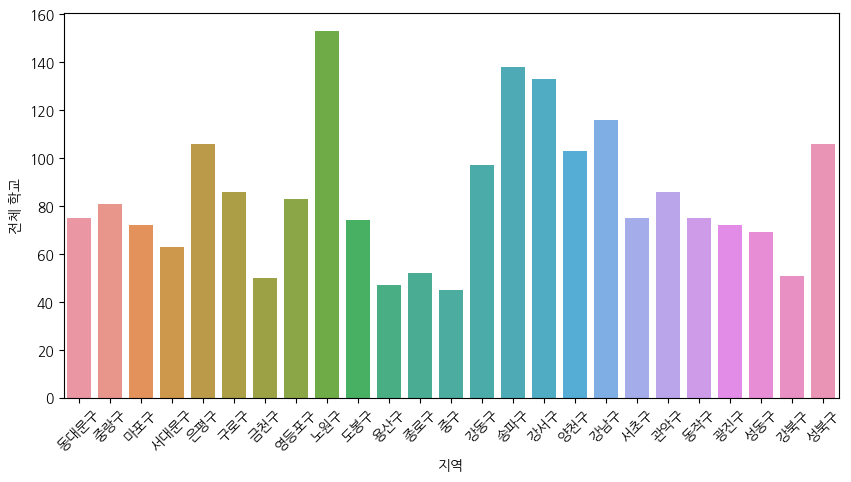

In [ ]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x='지역',y='전체 학교', data = school)
plt.xticks(rotation=45)

### 구별 학교 당 학생수

In [ ]:
#인구 중 학생에 해당하는 연령만 추출 0~19세
school_age = seoul_df.set_index('지역').iloc[:,28:30]

In [ ]:
school_age = school_age.applymap(lambda x: x.replace(',', ''))

In [ ]:
school_age = school_age.astype('int')

In [ ]:
school_cnt = school.set_index('지역').iloc[:25,4]

In [ ]:
#학생 인구와 학교 수 데이터 병합
school_df = pd.concat([school_age,school_cnt], axis = 1)
#학생 연령에 해당되는 나이대 합하기
school_df['학생 연령'] = school_df['0~9세'] + school_df['10~19세']
school_df.head()

,0~9세,10~19세,전체 학교,학생 연령
지역,,,,
종로구,6973,10308,52.0,17281
중구,6284,6405,45.0,12689
용산구,12613,14505,47.0,27118
성동구,19207,18812,69.0,38019
광진구,17726,24700,72.0,42426


In [ ]:
school_df['학교당 학생수'] = school_df['학생 연령'] / school_df['전체 학교']
school_df.head()

,0~9세,10~19세,전체 학교,학생 연령,학교당 학생수
지역,,,,,
종로구,6973,10308,52.0,17281,332.326923
중구,6284,6405,45.0,12689,281.977778
용산구,12613,14505,47.0,27118,576.978723
성동구,19207,18812,69.0,38019,551.000000
광진구,17726,24700,72.0,42426,589.250000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '종로구'),
  Text(1, 0, '중구'),
  Text(2, 0, '용산구'),
  Text(3, 0, '성동구'),
  Text(4, 0, '광진구'),
  Text(5, 0, '동대문구'),
  Text(6, 0, '중랑구'),
  Text(7, 0, '성북구'),
  Text(8, 0, '강북구'),
  Text(9, 0, '도봉구'),
  Text(10, 0, '노원구'),
  Text(11, 0, '은평구'),
  Text(12, 0, '서대문구'),
  Text(13, 0, '마포구'),
  Text(14, 0, '양천구'),
  Text(15, 0, '강서구'),
  Text(16, 0, '구로구'),
  Text(17, 0, '금천구'),
  Text(18, 0, '영등포구'),
  Text(19, 0, '동작구'),
  Text(20, 0, '관악구'),
  Text(21, 0, '서초구'),
  Text(22, 0, '강남구'),
  Text(23, 0, '송파구'),
  Text(24, 0, '강동구')])

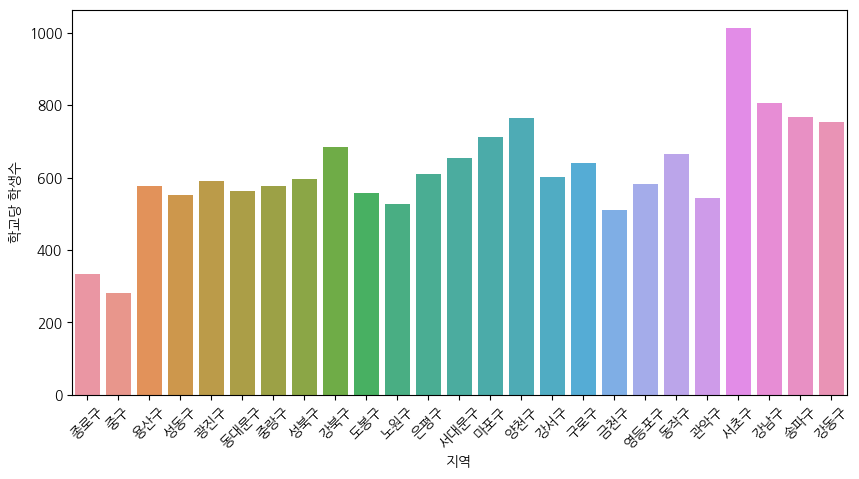

In [ ]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x=school_df.index,y='학교당 학생수', data = school_df)
plt.xticks(rotation=45)

-> 단순하게 학생 연령의 인구를 총 학교 수로 나누어 학교 당 학생수를 계산했을 때 서초구가 학교 당 학생수가 가장 많아 학생 인구 대비 학교 수가 적고, 종로구와 중구가 학교 당 학생수가 적어 학생 인구 대비 학교 수가 상대적으로 많은 것을 확인할 수 있음.

###구별 사업체 현황

In [ ]:
#집값별 사업체 분포 확인
#집값으로 sort되어있는 지역리스트 추출
ditinct_list = merge_h_f['지역'] 

In [ ]:
#사업체 리스트 확인
store_list = list(store_distribution.columns.unique()[1:])
store_list

['농업 임업 및 어업',
 '광업',
 '제조업',
 '전기 가스 증기 및 공기조절 공급업',
 '수도 하수 및 폐기물 처리 원료 재생업',
 '건설업',
 '도매 및 소매업',
 '운수 및 창고업',
 '숙박 및 음식점업',
 '정보통신업',
 '금융 및 보험업',
 '부동산업',
 '전문 과학 및 기술 서비스업',
 '사업시설 관리 사업 지원 및 임대 서비스업',
 '공공행정 국방 및 사회보장 행정',
 '교육 서비스업',
 '보건업 및 사회복지 서비스업',
 '예술 스포츠 및 여가관련 서비스업',
 '협회 및 단체 수리 및 기타 개인 서비스업']

In [ ]:
#사업체의 갯수 만큼 다른 색깔 생성
colors = sns.color_palette('hls',len(store_list))
colors

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.5354105263157893, 0.33999999999999997),
 (0.86, 0.6996210526315789, 0.33999999999999997),
 (0.8561684210526316, 0.86, 0.33999999999999997),
 (0.6919578947368422, 0.86, 0.33999999999999997),
 (0.5277473684210525, 0.86, 0.33999999999999997),
 (0.36353684210526294, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.4806736842105263),
 (0.33999999999999997, 0.86, 0.6448842105263157),
 (0.33999999999999997, 0.86, 0.8090947368421053),
 (0.33999999999999997, 0.7466947368421052, 0.86),
 (0.33999999999999997, 0.5824842105263155, 0.86),
 (0.33999999999999997, 0.41827368421052624, 0.86),
 (0.4259368421052626, 0.33999999999999997, 0.86),
 (0.5901473684210526, 0.33999999999999997, 0.86),
 (0.7543578947368419, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.8014315789473682),
 (0.86, 0.33999999999999997, 0.6372210526315789),
 (0.86, 0.33999999999999997, 0.47301052631578955)]

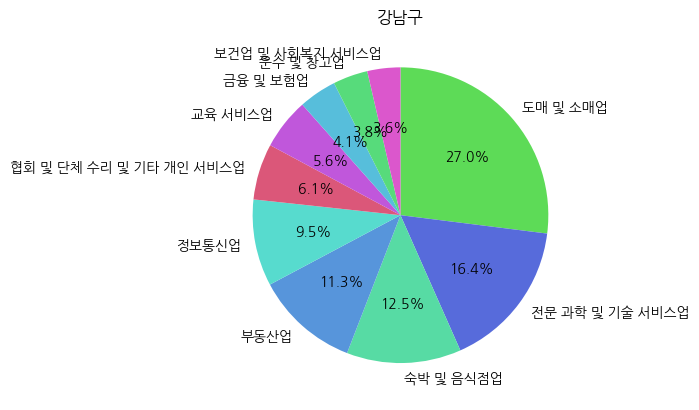

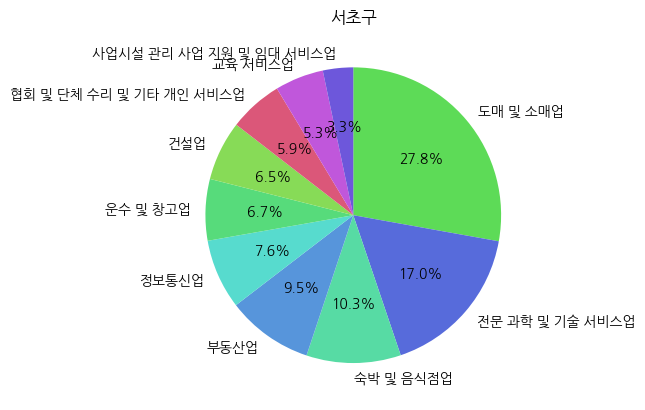

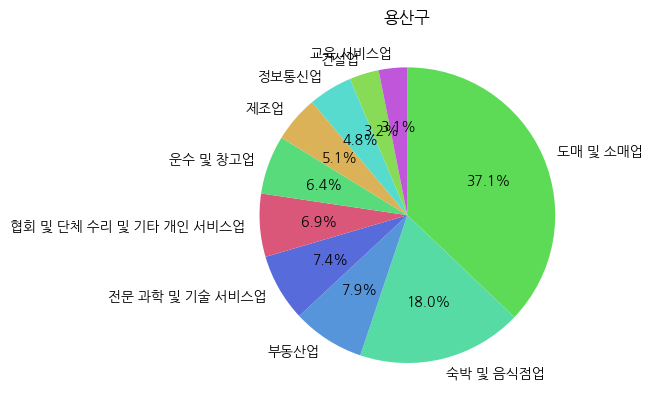

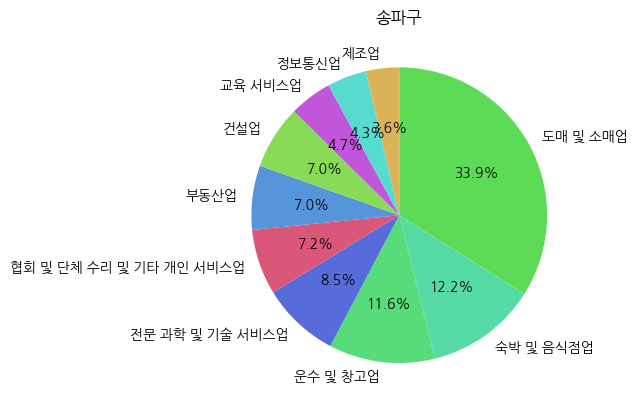

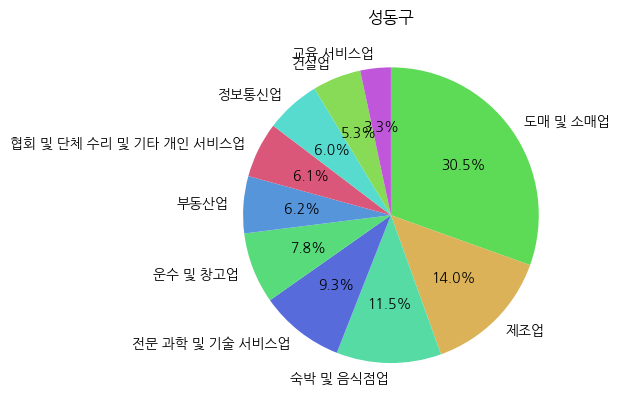

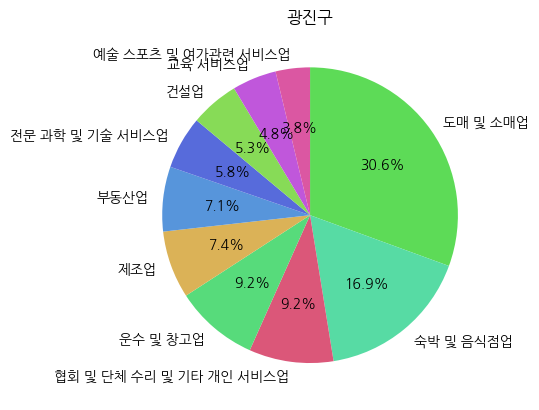

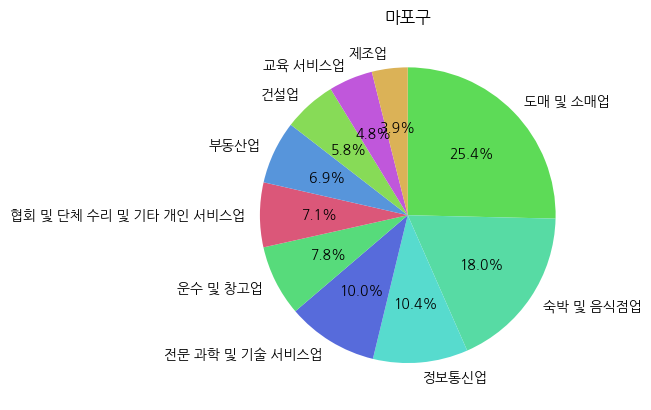

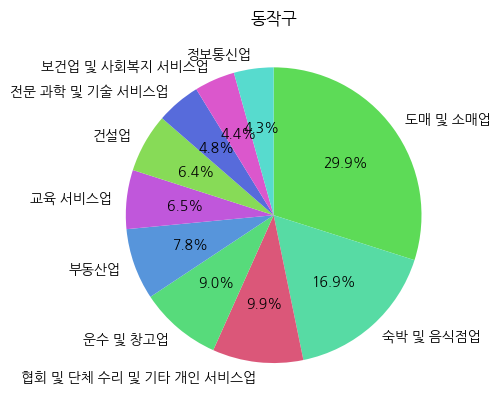

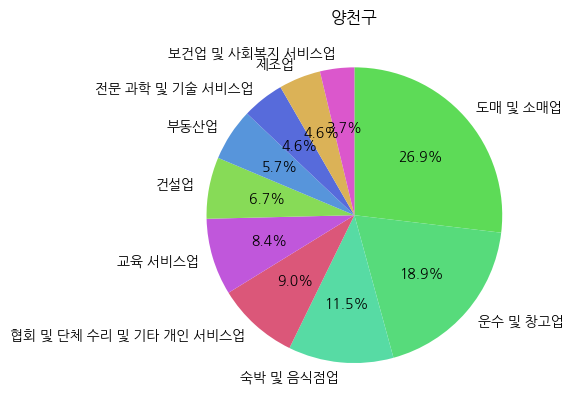

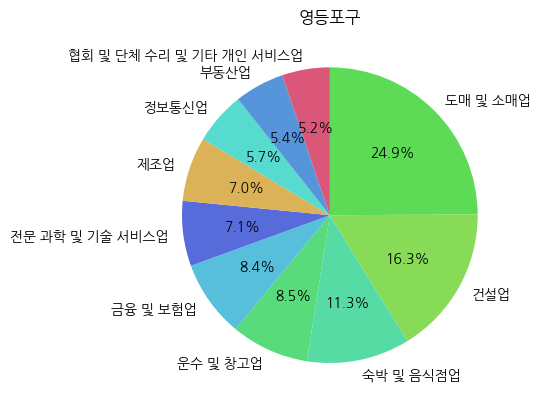

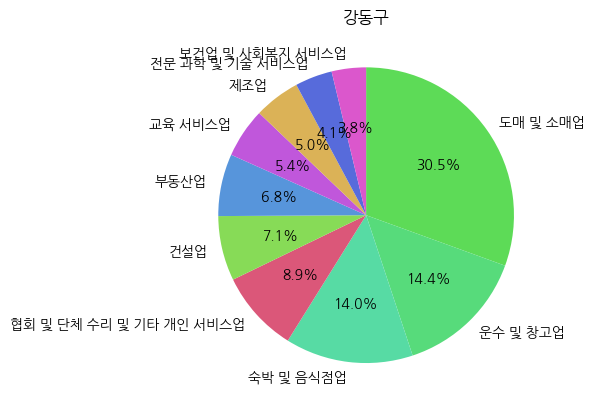

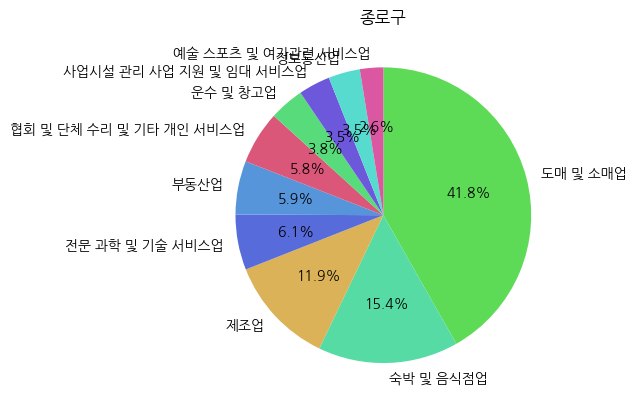

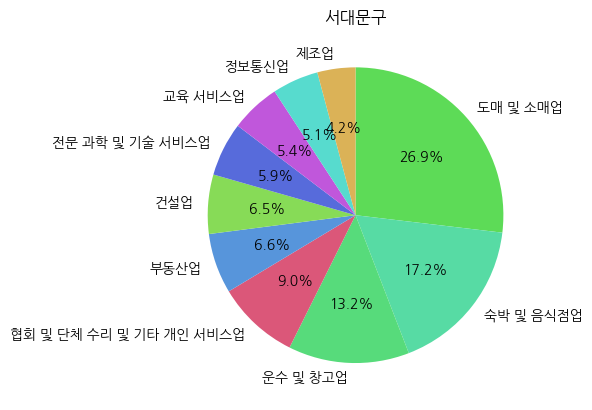

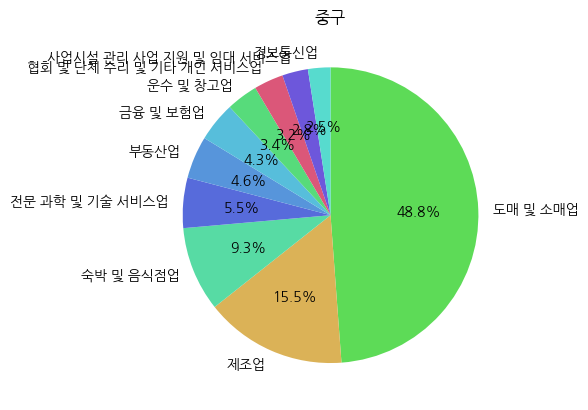

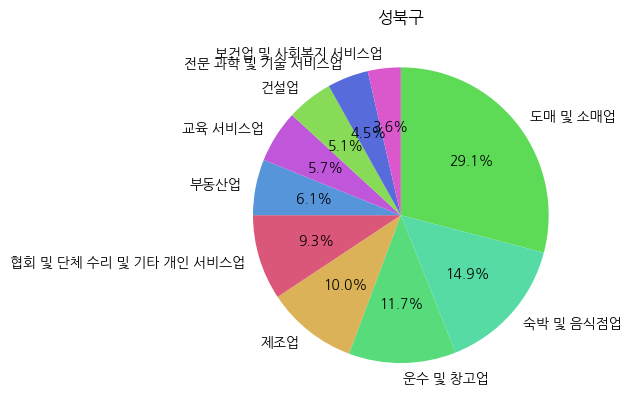

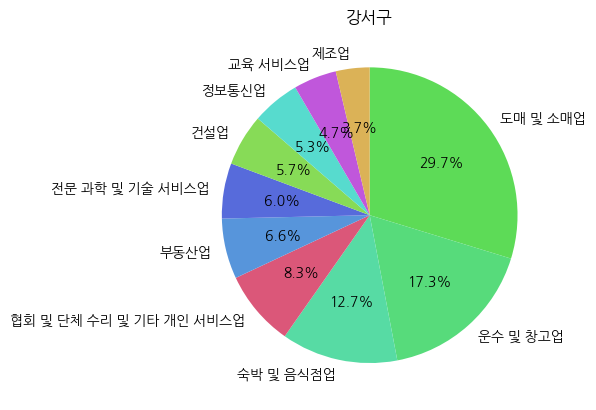

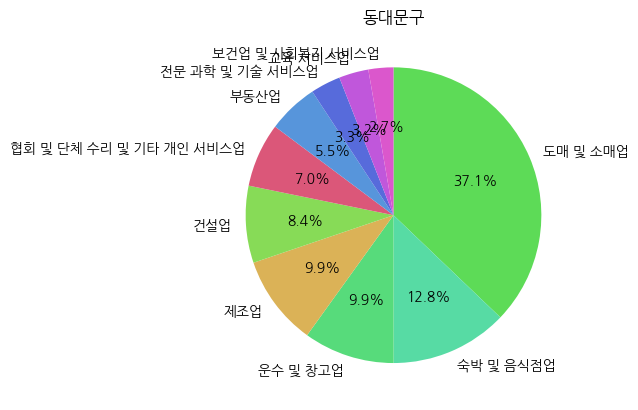

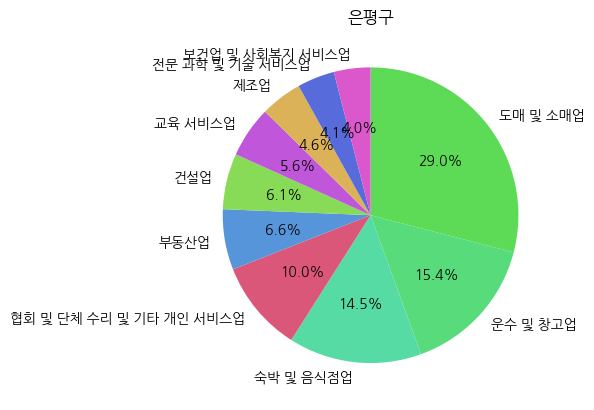

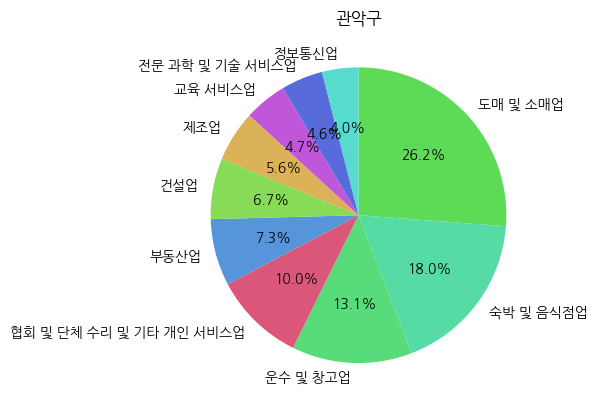

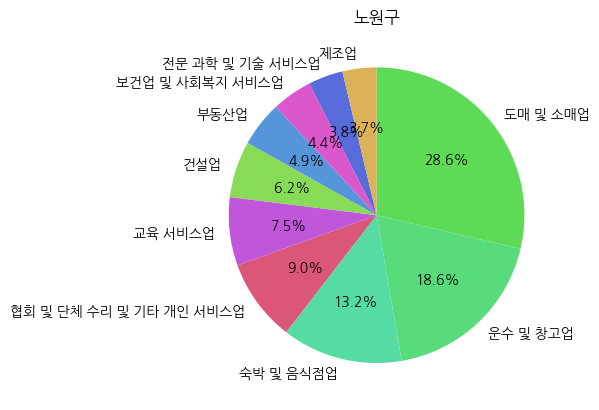

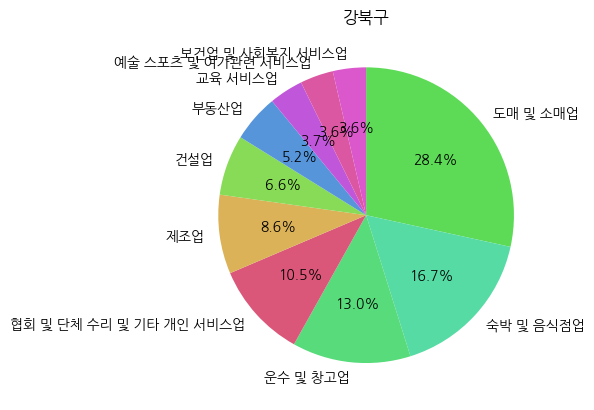

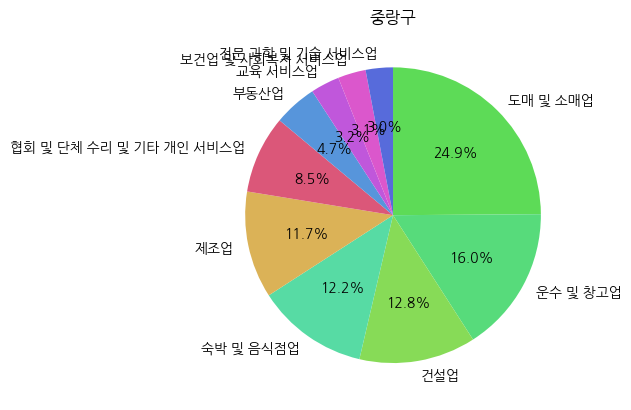

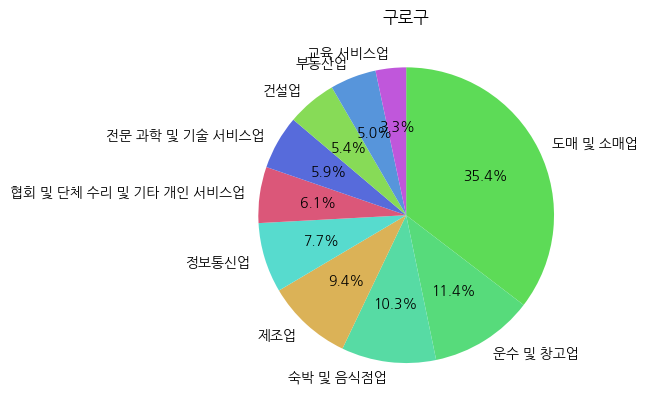

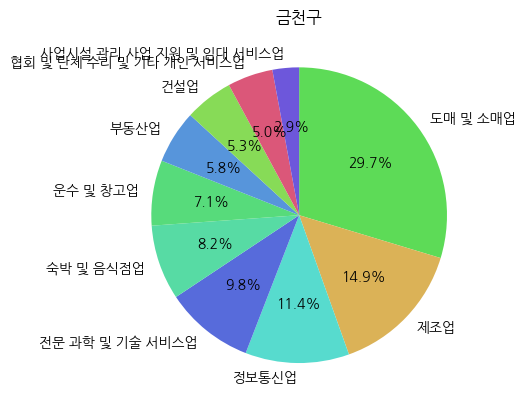

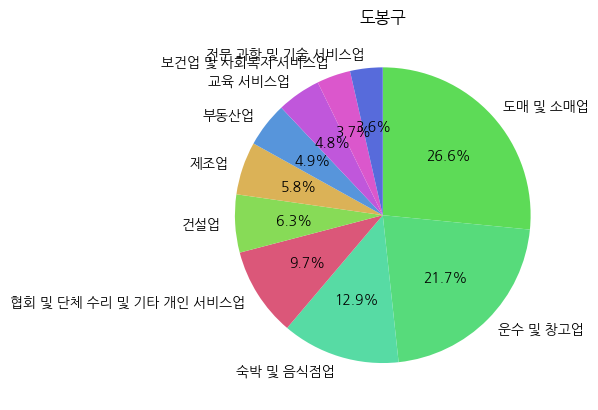

In [ ]:
for i in range(len(ditinct_list)):
  #plt.subplot(5,5,i+1)
  #25개라서 subplot을 하면 잘 안보입니다.

  #그지역에 해당하는 사업체 뽑기
  L = (store_distribution.loc[store_distribution['지역']==ditinct_list[i]])
  #이를 큰수순서로 정렬하고 상위 10개 나열
  Top10 = L.iloc[0][1:].sort_values(ascending = False).head(10)
  #그 상위 10개의 인덱스 반환(color 매치 위함)
  labels = Top10.index
  #각 사업체 마다 고유의 색부여
  color = [colors[store_list.index(i)] for i in labels]
  plt.pie(Top10, labels=labels,startangle=90,counterclock=False, autopct='%.1f%%',colors = color)
  plt.title(ditinct_list[i])
  plt.show()

## 3. 결론 및 추후 제안
* 집 값이 높을 수록 경제적 여유가 있는 사람들이 거주할 것이고, 따라서 출산율이 높을 것이라 생각했으나 집 값과 출산율의 상관관계는 거의 존재하지 않는 것으로 나타났다.

* 해당 분석 결과와 더불어 교통접근성, 거주 안전, 문화 시설 등의 데이터를 활용해서 원하는 조건에 적합한 집을 구하는데 도움을 주는 서비스를 개발할 수 있다. 
* 집을 구하기 위해서는 구보다 더 세부적인 단위로 나누어 분석하는 것이 거주지 선택에 도움이 더 될 것이다.